# Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df1=pd.read_table("data/training_set_1.tsv",header=None,names=["TweetId","UserId","Category","Tweet"])
df2=pd.read_table("data/training_set_2.tsv",header=None,names=["TweetId","UserId","Category","Tweet"])
df3=pd.read_table("data/training_set_3.tsv",header=None,names=["TweetId","UserId","Category","Tweet"])
# Have a grasp of how our data looks

In [2]:
df=pd.concat([df1,df2,df3])

In [3]:
df

,TweetId,UserId,Category,Tweet
0,343909778008973312,464336224,0,i don't fucking need humira
1,352823276889837570,590337731,0,"my retake is next friday, if i bloody fail aga..."
2,339867818843594756,246979971,0,"@doctorchristian scared to start fluoxetine, w..."
3,349294537367236611,149749939,0,"@intuitivegal1 ok, if you stopped taking the l..."
4,354256195432882177,54516759,0,novartis announces secukinumab (ain457) demons...
...,...,...,...,...
9956,469009954251481088,23177032,1,@hornetweb my mri scan shows when it happens b...
9957,468518427125358592,1961096371,1,remember 2003. vioxx costs $65m to ontario dru...
9958,512254891361075200,321391071,1,asians are at higher risk for severe allergic ...
9959,491775200610893825,2484689840,1,5. so what caused the #estrogen surges in #nuv...


In [4]:
df.describe()

,TweetId,UserId,Category
count,2.567800e+04,2.567800e+04,25678.000000
mean,4.265865e+17,6.369069e+08,0.092570
std,8.105669e+16,7.407954e+08,0.289834
min,3.263768e+17,3.840000e+03,0.000000
25%,3.445923e+17,8.934996e+07,0.000000
50%,4.403102e+17,3.391593e+08,0.000000
75%,5.095497e+17,9.422311e+08,0.000000
max,6.790513e+17,4.513290e+09,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25678 entries, 0 to 9960
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   TweetId   25678 non-null  int64 
 1   UserId    25678 non-null  int64 
 2   Category  25678 non-null  int64 
 3   Tweet     25678 non-null  object
dtypes: int64(3), object(1)
memory usage: 1003.0+ KB


array([[<AxesSubplot:title={'center':'Category'}>]], dtype=object)

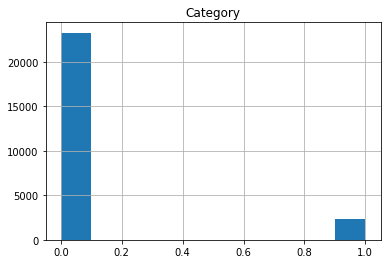

In [6]:
df.hist(column="Category")

# Preparing the Data for Modeling

In [7]:
# Importing the necessary modules
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [8]:
# Seperating predictors from outcome label 
y = df['Category']
X = df.drop(['Category'], axis =1)

#Converting all Tweets to lower-case
X['Tweet']=X['Tweet'].str.lower()

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
                                             X, y, 
                                             test_size=0.25, 
                                             random_state=53)

# Feature Engineering

# Text - Preprocessing

In [9]:
import nltk
#nltk.download('wordnet')

In [10]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [11]:
# function to lemmatize each row of Tweet column
def lemmatize_text(text):
  return ' '.join(lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text))

In [12]:
X_train['Tweet_l'] = X_train.Tweet.apply(lemmatize_text)
X_test['Tweet_l'] = X_test.Tweet.apply(lemmatize_text)
X_train.head()

c:\users\aniket thani\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,TweetId,UserId,Tweet,Tweet_l
2325,451041133188362240,16889710,also i've lost 8 lbs in the past two weeks tha...,also i've lost 8 lb in the past two week thank...
8491,349333590917644292,31300901,rt @diatribenews: dr john buse: most impressiv...,rt @diatribenews: dr john buse: most impressiv...
8950,328778635861442560,494325849,i suppose the only concern is that the lamotri...,i suppose the only concern is that the lamotri...
2105,468263508178927616,347310208,stay far away from avelox and other fluoroquin...,stay far away from avelox and other fluoroquin...
9254,537547144131923969,98568468,"""@watermelonbabyy: ventolin be like... im your...","""@watermelonbabyy: ventolin be like... im your..."


In [13]:
cv=CountVectorizer(stop_words="english",ngram_range=(1,2))

In [14]:
count_train=cv.fit_transform(X_train.Tweet_l.values)

In [15]:
count_test=cv.transform(X_test.Tweet_l.values)

In [16]:
cv.get_feature_names()[:20] #get first 20 features

['00',
 '00 01',
 '00 30',
 '00 day',
 '00 ecuador',
 '00 feeding',
 '00 income',
 '00 jst',
 '00 month',
 '00 monthly',
 '00 pain',
 '00 pill',
 '00 pm',
 '00 problem',
 '00 smith',
 '00 spain',
 '00 symbicort',
 '00 today',
 '00 went',
 '00 world']

# TFIDF

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tfidf=TfidfVectorizer(stop_words="english",max_df=0.7)

In [19]:
tfidf_train=tfidf.fit_transform(X_train.Tweet_l.values)

In [20]:
tfidf_test=tfidf.transform(X_test.Tweet_l.values)

In [21]:
tfidf.get_feature_names()[:20]

['00',
 '000',
 '000mg',
 '0011',
 '005',
 '0067',
 '00pm',
 '01',
 '02',
 '0214',
 '025',
 '03',
 '03_pfe_',
 '04',
 '040ptrpluc',
 '0430',
 '0432utc',
 '045',
 '05',
 '0511']

# Modeling - process: picking the correct class of Algorithm

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score

In [23]:
nb_clf=MultinomialNB()

In [24]:
#using Count Train and Test

nb_clf.fit(count_train,y_train)

# Creating the predicted tags: pred
preds=nb_clf.predict(count_test)

# Calculating the accuracy score: score
from sklearn.metrics import accuracy_score
scores=accuracy_score(y_test,preds)

print(scores)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,preds)
print(cm)

0.9098130841121496
[[5810    6]
 [ 573   31]]


In [25]:
#using Tfidf Train and Test
nb_clf2=MultinomialNB()
nb_clf2.fit(tfidf_train,y_train)

preds2=nb_clf2.predict(tfidf_test)

scores2=accuracy_score(y_test,preds2)

print(scores2)

cm2=confusion_matrix(y_test,preds2)
print(cm2)

0.9059190031152647
[[5816    0]
 [ 604    0]]


# Let's Try Logistic Regression Classifier on Count Vectors

In [26]:
from sklearn.linear_model import LogisticRegression
lg_clf=LogisticRegression()
lg_clf.fit(count_train,y_train)
preds_c=lg_clf.predict(count_test)

print(accuracy_score(y_test,preds_c))


0.9179127725856698


# Using advanced Classification Algos for prediction and Comparing their Accuracy

In [27]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB


dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    'NB_Classifier':MultinomialNB()

}

In [28]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, count_train, y_train, cv=3)
log_reg_mean = log_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, count_train, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, count_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, count_train, y_train, cv=3)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, count_train, y_train, cv=3)
rand_mean = rand_scores.mean()


# Naives Bayes
nav_clf = MultinomialNB()
nav_scores = cross_val_score(nav_clf, count_train, y_train, cv=3)
nav_mean = nav_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, knn_mean, tree_mean, grad_mean, rand_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

In [29]:
result_df

,Classifiers,Crossval Mean Scores
0,Logistic Reg.,0.918891
1,KNN,0.908194
2,Dec Tree,0.902482
3,Grad B CLF,0.912660
4,Rand FC,0.911725
5,Naives Bayes,0.880258


# As we can see Logistic Regression Clearly outperformed all other Class of Alogorithms, So we will proceed with Logistics Regression for our Final Model

In [30]:
log_clf=LogisticRegression()

In [31]:
log_clf.fit(count_train,y_train)

LogisticRegression()

In [32]:
log_clf.score(count_train,y_train)

0.9951708380932599

In [33]:
scores=cross_val_score(log_clf,count_train,y_train,cv=4)

In [34]:
scores.mean()

0.919098555571518

# Tuning Hyperparameters using GridSearchCV

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
params_set={
    'penalty':['l1','l2','elasticnet'],
    'C':[0.5,0.7,0.85,1,1.5,2,2.5,5,10],
    'tol':[0.04,0.05,0.06],
   'solver':['liblinear','warn']},
    

In [37]:
gsearch=GridSearchCV(log_clf,params_set,scoring="accuracy",cv=3,n_jobs=-1)

In [38]:
gsearch.fit(count_train,y_train)

c:\users\aniket thani\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.91769645 0.91800798 0.91774835        nan        nan        nan
 0.91764451 0.91764451 0.91764451        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.91909842 0.91904651 0.91915037        nan        nan        nan
 0.91878691 0.91878691 0.91878691        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.91883879 0.91889078 0.91935808        nan        nan        nan
 0.91852728 0.918735   0.9190985         nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.91899461 0.91909842 0.91909846        nan        nan        nan
 0.91915042 0.91915042 0.91915042        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.91790425 0.918

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=({'C': [0.5, 0.7, 0.85, 1, 1.5, 2, 2.5, 5, 10],
                          'penalty': ['l1', 'l2', 'elasticnet'],
                          'solver': ['liblinear', 'warn'],
                          'tol': [0.04, 0.05, 0.06]},),
             scoring='accuracy')

In [39]:
gsearch.best_score_

0.9194619442507211

In [40]:
gsearch.best_params_

{'C': 2.5, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.04}

# Building our final model using Parameters returned by GridSearchCV

In [41]:
log_clf=LogisticRegression(**gsearch.best_params_,random_state=5)

In [42]:
log_clf.fit(count_train,y_train)

LogisticRegression(C=2.5, random_state=5, solver='liblinear', tol=0.04)

In [43]:
log_clf.score(count_train,y_train)

0.9987537646692284

In [44]:
from sklearn.metrics import classification_report

In [45]:
y_preds=log_clf.predict(count_train)

In [46]:
print(classification_report(y_train,y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17485
           1       1.00      0.99      0.99      1773

    accuracy                           1.00     19258
   macro avg       1.00      0.99      1.00     19258
weighted avg       1.00      1.00      1.00     19258



# Using Model to predict on Test Data

In [47]:
y_preds_test=log_clf.predict(count_test)

In [48]:
accuracy_score(y_test,y_preds_test)

0.9180685358255452

In [49]:
print(classification_report(y_test,y_preds_test))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5816
           1       0.68      0.25      0.36       604

    accuracy                           0.92      6420
   macro avg       0.80      0.62      0.66      6420
weighted avg       0.90      0.92      0.90      6420



In [50]:
confusion_matrix(y_test,y_preds_test)

array([[5746,   70],
       [ 456,  148]], dtype=int64)